In [0]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from urllib.request import urlopen

The following function get_images() returns the dataset of 10 images as a list of images.

In [0]:
# do not modify the following code
def get_images():
  num_im = 10
  ims = []
  for i in range(num_im):
    url = 'https://raw.githubusercontent.com/guptashvm/Data/master/data/%02d.png'%(i)
    with urlopen(url) as file:
      im = mpimg.imread(file)
      ims.append(im)
  return ims

In this problem we will work on image compression using SVD. The basic concept is to represent an image with size $m \times n$ as a two-dimentional $m \times n$ matrix. SVD is then applied to this matrix to obtain the U, S, and V matrices. S is a diagonal $m \times n$ matrix whose number of non-zero elements on the diagonal determines the rank of the original matrix. Then we can use a smaller number of rank to approximate the original image. For example, you can keep the biggest $k$ singular values and set all the others to 0. 
    
We provide 10 images in the dataset. Try $k=1, 2, \dots, 30$ to reconstruct the original images and plot the error averaged on all the images. You can measure the reconstruction error by mean L1 error. It is defined as:

$$error_{l_1} = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}||reconstruction(i,j)-original(i,j)||_1$$

Text(0, 0.5, 'Error L1')

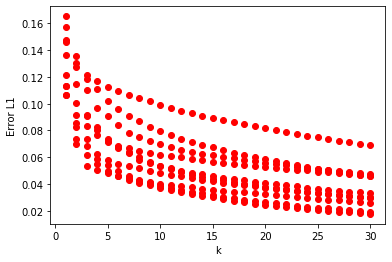

In [19]:
def calculate_error(original_image, reconstructed_image):
    error = 0
    for i in range(224):
      for j in range(224):
        error += abs(reconstructed_image[i,j]-original_image[i,j])
    return error / (224*224)


images = get_images()
original = []
for i in range(10):
  original.append(images[i][:,:,0])

# perform the SVD
u = []
s = []
v = []
for i in range(10):
  this_u, this_s, this_v = np.linalg.svd(original[i], full_matrices=True)
  u.append(this_u)
  s.append(this_s)
  v.append(this_v)

for k in range(1, 31):
  for i in range(10):
    top_k = np.zeros(224)
    this_s = s[i]
    top_k[0:k] = this_s[0:k]
    np.pad(top_k, (0,224-k), 'constant', constant_values=(0))
    reconstructed = np.matmul(np.matmul(u[i], np.diag(top_k)), v[i])
    plt.plot(k, calculate_error(original[i], reconstructed), 'ro', scalex=True, scaley=True)
plt.xlabel('k')
plt.ylabel('Error L1')


Also visualize some reconstructed images and compare them to the original **ones**. Display the first image in the dataset along with its rank $10$ approximation. Also, display the second image in the dataset along with its rank $15$ approximation.

The first original image:


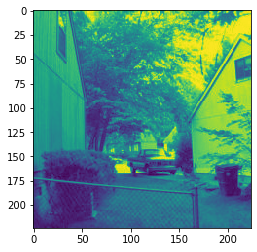

In [15]:
print('The first original image:')
plt.imshow(original[0])

The rank 10 reconstructed image:


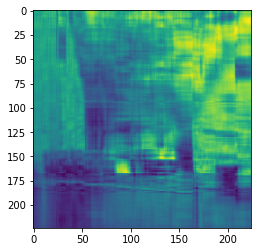

In [14]:
k_10 = np.zeros(224)
this_s = s[0]
k_10[0:10] = this_s[0:10]
np.pad(k_10, (0,214), 'constant', constant_values=(0))
reconstructed = np.matmul(np.matmul(u[0], np.diag(k_10)), v[0])
print('The rank 10 reconstructed image:')
plt.imshow(reconstructed)

The second original image:


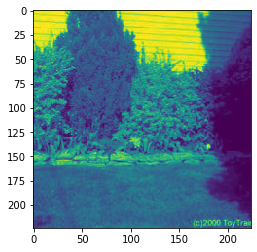

In [16]:
print('The second original image:')
plt.imshow(original[1])

The rank 15 reconstructed image:


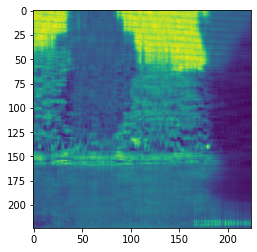

In [17]:
k_15 = np.zeros(224)
this_s = s[1]
k_15[0:15] = this_s[0:15]
np.pad(k_15, (0,209), 'constant', constant_values=(0))
reconstructed = np.matmul(np.matmul(u[1], np.diag(k_15)), v[1])
print('The rank 15 reconstructed image:')
plt.imshow(reconstructed)